In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1


    
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | birjand
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | nago
Processing Record 7 of Set 1 | loncoche
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | jiddah
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | pasuquin
Processing Record 13 of Set 1 | goderich
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | thunder bay
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | harper
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | las lomas
Processing Record 20 of Set 1 | shenzhen
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | bethel
P

Processing Record 39 of Set 4 | new philadelphia
Processing Record 40 of Set 4 | malanje
Processing Record 41 of Set 4 | yaan
Processing Record 42 of Set 4 | qujing
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | shizunai
Processing Record 45 of Set 4 | kailua
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | mandurah
Processing Record 48 of Set 4 | puerto escondido
Processing Record 49 of Set 4 | husavik
Processing Record 50 of Set 4 | marcona
City not found. Skipping...
Processing Record 1 of Set 5 | kimbe
Processing Record 2 of Set 5 | kaitong
Processing Record 3 of Set 5 | juneau
Processing Record 4 of Set 5 | port hardy
Processing Record 5 of Set 5 | agadez
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | ponta do sol
Processing Record 8 of Set 5 | zhuanghe
Processing Record 9 of Set 5 | dryden
Processing Record 10 of Set 5 | ambilobe
Processing Record 11 of Set 5 | biak
Processing Record 12 of Set 5 | ku

Processing Record 20 of Set 8 | coihaique
Processing Record 21 of Set 8 | magangue
Processing Record 22 of Set 8 | dukat
Processing Record 23 of Set 8 | hirara
Processing Record 24 of Set 8 | codrington
Processing Record 25 of Set 8 | iralaya
Processing Record 26 of Set 8 | krasnoyarsk
Processing Record 27 of Set 8 | bayangol
Processing Record 28 of Set 8 | yar-sale
Processing Record 29 of Set 8 | fukue
Processing Record 30 of Set 8 | conselheiro lafaiete
Processing Record 31 of Set 8 | grajau
Processing Record 32 of Set 8 | luderitz
Processing Record 33 of Set 8 | hernani
Processing Record 34 of Set 8 | marfino
Processing Record 35 of Set 8 | xuddur
Processing Record 36 of Set 8 | santa cruz
Processing Record 37 of Set 8 | uvat
Processing Record 38 of Set 8 | najran
Processing Record 39 of Set 8 | cape elizabeth
City not found. Skipping...
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | poum
Processing Record 42 of Set 8 | tawau
Processing Record 43 of Set 8 | n

Processing Record 6 of Set 12 | chapais
Processing Record 7 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 8 of Set 12 | kalush
Processing Record 9 of Set 12 | les cayes
Processing Record 10 of Set 12 | sirfa
City not found. Skipping...
Processing Record 11 of Set 12 | lasa
Processing Record 12 of Set 12 | mgandu
Processing Record 13 of Set 12 | rosario
Processing Record 14 of Set 12 | ewa beach
Processing Record 15 of Set 12 | davila
Processing Record 16 of Set 12 | babu
Processing Record 17 of Set 12 | fort nelson
Processing Record 18 of Set 12 | sola
Processing Record 19 of Set 12 | leningradskiy
Processing Record 20 of Set 12 | sosnovo-ozerskoye
Processing Record 21 of Set 12 | znamenskoye
Processing Record 22 of Set 12 | phalombe
Processing Record 23 of Set 12 | boyolangu
Processing Record 24 of Set 12 | sillamae
Processing Record 25 of Set 12 | mantua
Processing Record 26 of Set 12 | anderson
Processing Record 27 of Set 12 | peniche
Processing Record 28 of S

In [9]:
len(city_data)

553

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,60.15,82,83,10.58,UY,2022-07-14 14:30:29
1,Dingle,10.9995,122.6711,76.24,92,55,1.54,PH,2022-07-14 14:30:29
2,Torbay,47.6666,-52.7314,75.88,60,40,14.97,CA,2022-07-14 14:30:29
3,Birjand,32.8663,59.2211,86.47,11,0,23.02,IR,2022-07-14 14:30:30
4,Hobart,-42.8794,147.3294,47.05,95,75,1.14,AU,2022-07-14 14:26:16
5,Nago,26.5881,127.9761,86.85,91,100,7.67,JP,2022-07-14 14:30:30
6,Loncoche,-39.3667,-72.6333,41.09,88,57,2.82,CL,2022-07-14 14:30:31
7,Thompson,55.7435,-97.8558,64.56,94,100,2.30,CA,2022-07-14 14:30:22
8,Tuatapere,-46.1333,167.6833,39.88,90,92,2.06,NZ,2022-07-14 14:25:53
9,Punta Arenas,-53.1500,-70.9167,35.71,80,75,9.22,CL,2022-07-14 14:30:11


In [13]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng",
                    "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-07-14 14:30:29,-33.6971,-53.4616,60.15,82,83,10.58
1,Dingle,PH,2022-07-14 14:30:29,10.9995,122.6711,76.24,92,55,1.54
2,Torbay,CA,2022-07-14 14:30:29,47.6666,-52.7314,75.88,60,40,14.97
3,Birjand,IR,2022-07-14 14:30:30,32.8663,59.2211,86.47,11,0,23.02
4,Hobart,AU,2022-07-14 14:26:16,-42.8794,147.3294,47.05,95,75,1.14
...,...,...,...,...,...,...,...,...,...
548,Kenai,US,2022-07-14 14:48:48,60.5544,-151.2583,54.03,95,100,5.75
549,Hofn,IS,2022-07-14 14:48:48,64.2539,-15.2082,60.82,44,20,21.85
550,Iracoubo,GF,2022-07-14 14:48:48,5.4802,-53.2011,85.59,65,38,6.73
551,Severodvinsk,RU,2022-07-14 14:48:49,64.5635,39.8302,75.31,60,91,1.23


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

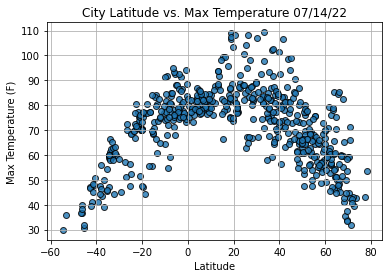

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot.
plt.show()

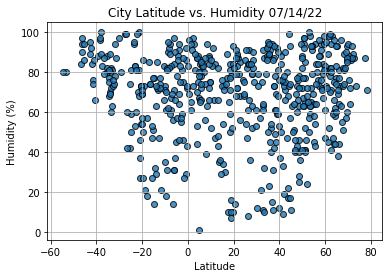

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot.
plt.show()

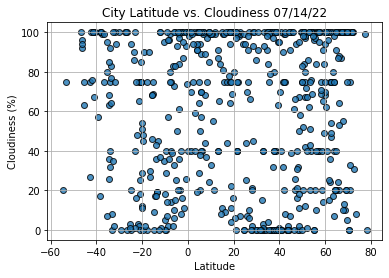

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot.
plt.show()

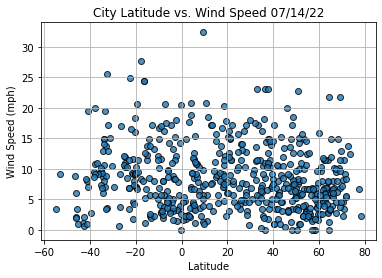

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot.
plt.show()